## Getting imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import re

## Helper functions to read data from experiments

In [3]:
def read_list(filename: str) -> list:
    """ Extract the diversity or novelty list from txt file
    
        Example usage:
        >>> read_list('jaccard_diversities_real.txt')
    """
    with open(file=filename, mode='r', encoding="ISO-8859-1") as f:
        result_list = list()
        data = f.read().split(',\n')
        for line in data:
            result_list.append(float(re.findall("\d+\.\d+", line)[0]) if line != 'inf' else 0)
            
    return result_list

## Functions to plot 

In [4]:
def normal_distribution(values: list, name_of_values: str) -> None:
    """
    
    Example usage:
    >>> normal_distribution(all_diversities, 'Diversity of generated text')
    """

    mean = np.nanmean(values)
    sigma = np.nanstd(values)

    num_bins = 100

    fig, ax = plt.subplots()

    #the histogram of the data
    n, bins, _ = ax.hist(values, num_bins, normed=True)

    # add a 'best fit' line
    y = mlab.normpdf(bins, mean, sigma)
    ax.plot(bins, y, linewidth=2, color='r')
    ax.set_xlabel(name_of_values)
#     ax.set_xlim([0.5,1])
    ax.set_ylabel('Probability density')
    ax.set_title(r'Histogram of distribution: $\mu={}$, $\sigma={}$'.format(
        round(mean, 3), round(sigma, 3)))

    # plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    #                          np.exp(- (bins - mean)**2 / (2 * sigma**2)),
    #                    linewidth=2, color='r')

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

In [54]:
def get_scatter_plot(data_x, data_y, data_x1, data_y1):
    """ Scatter plot of novelties vs diversities. 
    """
    plt.scatter(data_x, data_y, color='darkorange', marker='^', label='Fake text', alpha=1)
    plt.scatter(data_x1, data_y1, color='blue', marker='o', label='Real text', alpha=0.1)

    plt.title('{} vs {} of real and fake sentences'.format("Novelties", "Diversities"))
    plt.xlabel('Diversity of sentence')
#     plt.xlim(0, 1)
#     plt.ylim(0, 1)
    plt.ylabel('Novelty of sentence')
    plt.legend(loc='upper left')
    plt.show()

## Using results from Word Mover's Distance metric

## Retrieve the list of diversity and novelty from the text files

In [55]:
real_diversities = read_list('wmd_diversities_real.txt')
real_novelties = read_list('wmd_novelties_real.txt')

fake_diversities = read_list('wmd_diversities_fake2.txt')
fake_novelties = read_list('wmd_novelties_fake2.txt')


### Scatter plot of novelties vs diversities

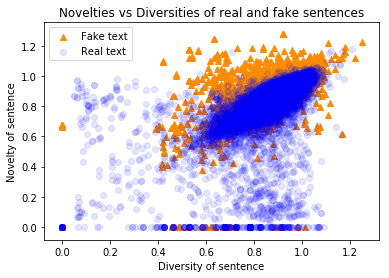

In [56]:
get_scatter_plot(fake_diversities, fake_novelties, real_diversities, real_novelties)

In [22]:
def normalize(values):
    min_val, max_val = min(values), max(values)
    return [(val - min_val) / (max_val - min_val) for val in values]

normed_real_diversities = normalize(read_list('wmd_diversities_real.txt'))
normed_real_novelties = normalize(read_list('wmd_novelties_real.txt'))

normed_fake_diversities = normalize(read_list('wmd_diversities_fake2.txt'))
normed_fake_novelties = normalize(read_list('wmd_novelties_fake2.txt'))

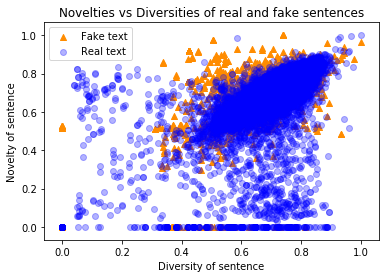

In [23]:
get_scatter_plot(normed_fake_diversities, normed_fake_novelties, normed_real_diversities, normed_real_novelties)

In [88]:
def inverse_distances(distances):
    return [1 / (distance + 1) for distance in distances]

## Real text: Distribution of novelties and diversities (distances)

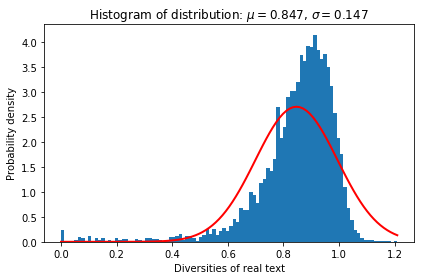

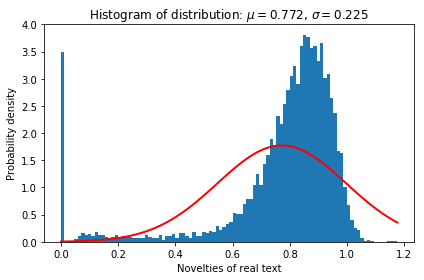

In [83]:
normal_distribution(real_diversities, 'Diversities of real text')
normal_distribution(real_novelties, 'Novelties of real text')

## Real text: Distribution of normalised novelties and diversities (distances)

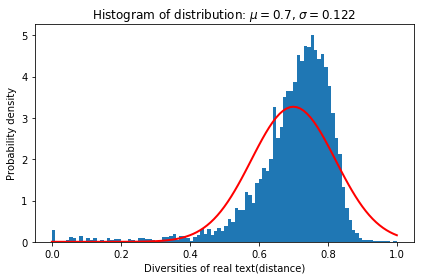

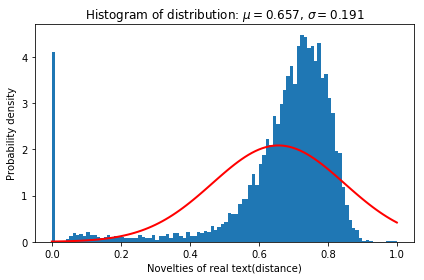

In [89]:
normal_distribution(normed_real_diversities, 'Diversities of real text(distance)')
normal_distribution(normed_real_novelties, 'Novelties of real text(distance)')

## Real text: Distribution of normalised novelties and diversities (similarities)

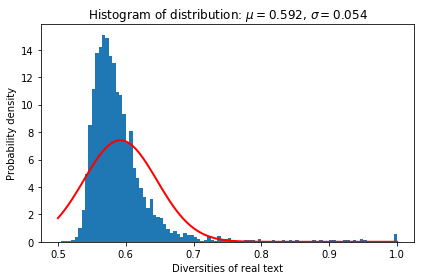

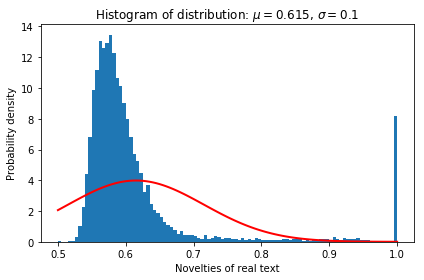

In [90]:
normal_distribution(inverse_distances(normed_real_diversities), 'Diversities of real text')
normal_distribution(inverse_distances(normed_real_novelties), 'Novelties of real text')

## Fake text: Distribution of novelties and diversities (distances)

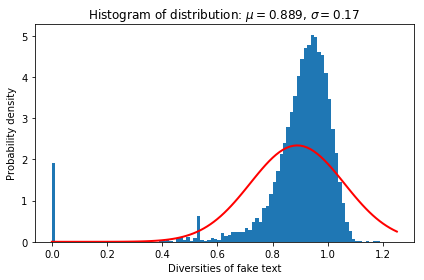

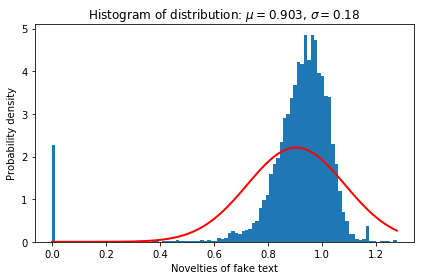

In [92]:
normal_distribution(fake_diversities, 'Diversities of fake text')
normal_distribution(fake_novelties, 'Novelties of fake text')

## Fake text: Distribution of normalised novelties and diversities

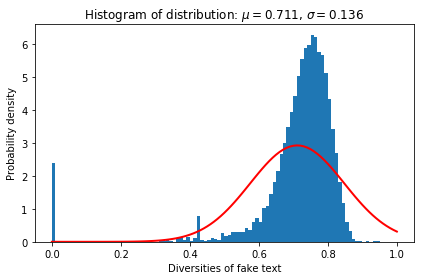

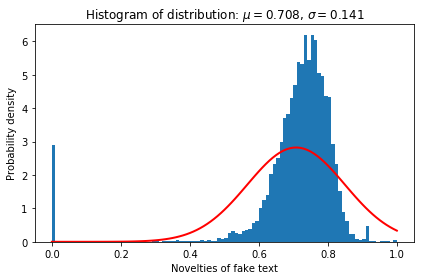

In [86]:
normal_distribution(normed_fake_diversities, 'Diversities of fake text')
normal_distribution(normed_fake_novelties, 'Novelties of fake text')

## Fake text: Distribution of normalised novelties and diversities


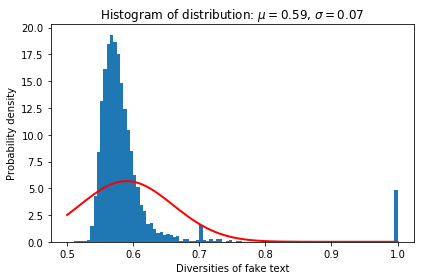

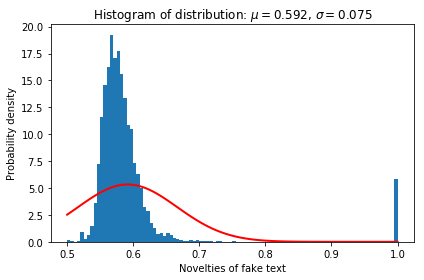

In [93]:
normal_distribution(inverse_distances(normed_fake_diversities), 'Diversities of fake text')
normal_distribution(inverse_distances(normed_fake_novelties), 'Novelties of fake text')

In [ ]:
function norm_value = normalised_diff( data )
% Normalise values of an array to be between -1 and 1
% original sign of the array values is maintained.
if abs(min(data)) > max(data)
      max_range_value = abs(min(data));
      min_range_value = min(data);
  else
      max_range_value = max(data);
      min_range_value = -max(data);
  end
norm_value = 2 .* data ./ (max_range_value - min_range_value);
end